目录：

1、绘图数据准备

2、seaborn.regplot

 - regplot默认参数线型回归图
 - 分别设置点和拟合线属性
 - 置信区间（confidence interval）设置
 - 拟合线延伸与坐标轴相交 
 - 拟合离散变量曲线
 - 多项式回归（ polynomial regression）拟合曲线

3-、seaborn.lmplot
 - 按变量分类拟合回归线
 - 散点marker设置
 - 散点调色盘
 - 拟合线属性设置
 - 绘制分面图 
    
参考资料：https://mp.weixin.qq.com/s/pi7_v1E6zkDKRYwjx0DgNw

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
from sklearn import datasets
import seaborn as sns
#导入鸢尾花iris数据集（方法一）
#该方法更有助于理解数据集
iris=datasets.load_iris()
x, y =iris.data,iris.target
y_1 = np.array(['setosa' if i==0 else 'versicolor' if i==1 else 'virginica' for i in y])
pd_iris = pd.DataFrame(np.hstack((x, y_1.reshape(150,1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])
 
#astype修改pd_iris中数据类型object为float64
pd_iris['sepal length(cm)']=pd_iris['sepal length(cm)'].astype('float64')
pd_iris['sepal width(cm)']=pd_iris['sepal width(cm)'].astype('float64')
pd_iris['petal length(cm)']=pd_iris['petal length(cm)'].astype('float64')
pd_iris['petal width(cm)']=pd_iris['petal width(cm)'].astype('float64')
 
 
# 导入鸢尾花iris数据集（方法二）
#该方法有时候会卡巴斯基，所以弃而不用
#import seaborn as sns
#iris_sns = sns.load_dataset("iris")
pd_iris.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2、seaborn.regplot

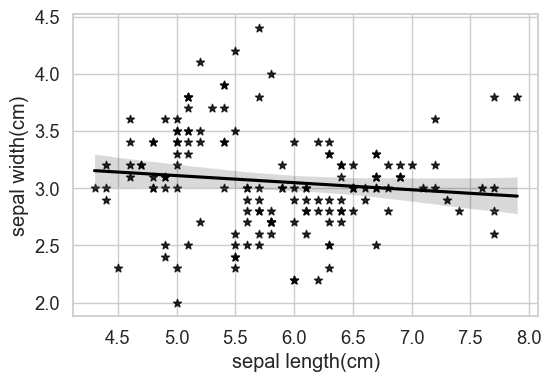

In [3]:
# regplot默认参数线型回归图
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)#设置主题，文本大小
g=sns.regplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             color='#000000',#设置marker及线的颜色
             marker='*',#设置marker形状
             )

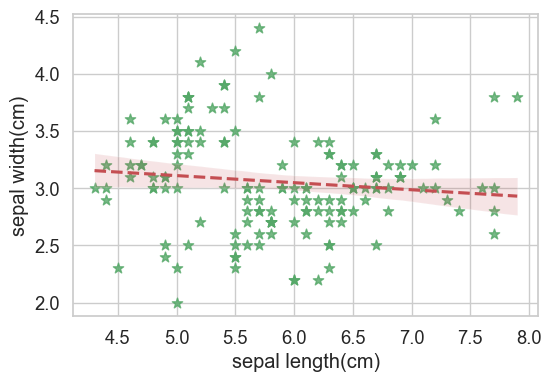

In [6]:
# 分别设置点和拟合线属性
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.regplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
              color='#000000',
              marker='*',
              scatter_kws={'s': 60,'color':'g',},#设置散点属性，参考plt.scatter
              line_kws={'linestyle':'--','color':'r'}#设置线属性，参考 plt.p
             )

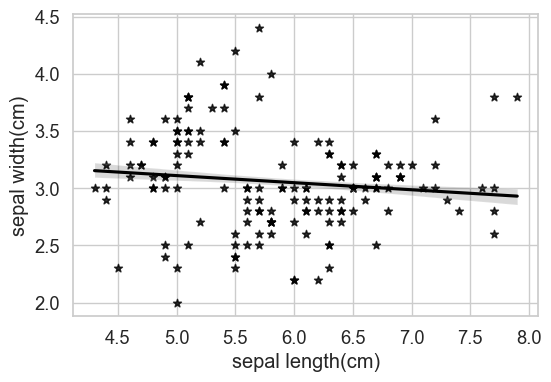

In [7]:
# 置信区间（confidence interval）设置
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.regplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             color='#000000',
             marker='*',
             ci=60,#置信区间设置，默认为95%置信区间，越大线周围阴影部分面积越大
             )

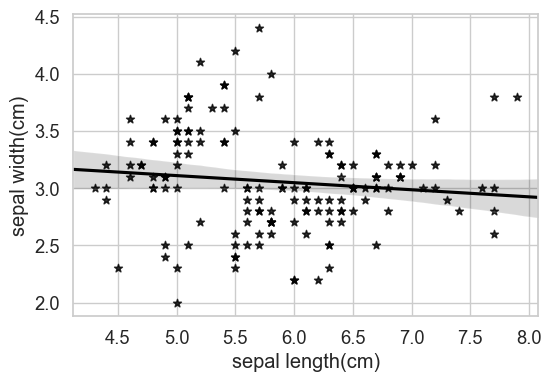

In [8]:
# 拟合线延伸与坐标轴相交
# extend the regression line to the axis limits
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.regplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             color='#000000',
             marker='*',
             truncate=False,#让拟合线与轴相交
             )

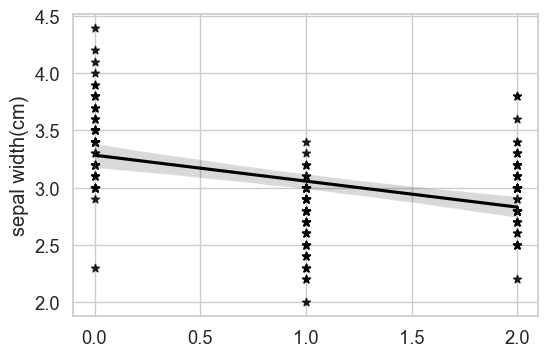

In [9]:
# 拟合离散变量曲线
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
x_discrete=[0 if i=='setosa' else 1 if i=='versicolor' else 2 for i in pd_iris['class']]#
g=sns.regplot(x=x_discrete, y='sepal width(cm)', data=pd_iris,#x此时为离散变量
             color='#000000',
             marker='*',
             )

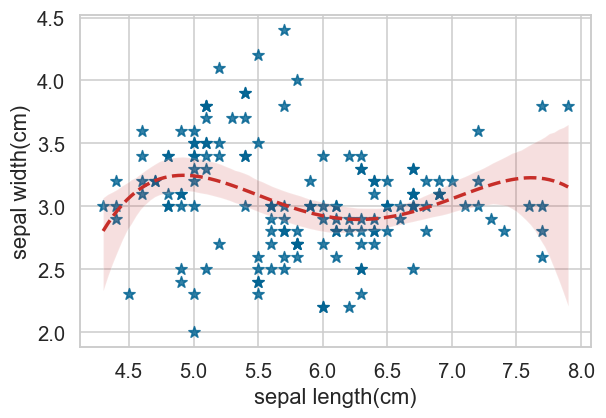

In [10]:
# 多项式回归（ polynomial regression）拟合曲线
plt.figure(dpi=110)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.regplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             marker='*',
             order=4,#默认为1，越大越弯曲
             scatter_kws={'s': 60,'color':'#016392',},#设置散点属性，参考plt.scatter
             line_kws={'linestyle':'--','color':'#c72e29'}#设置线属性，参考 plt.plot             
             
             )

3、seaborn.lmplot

<Figure size 600x400 with 0 Axes>

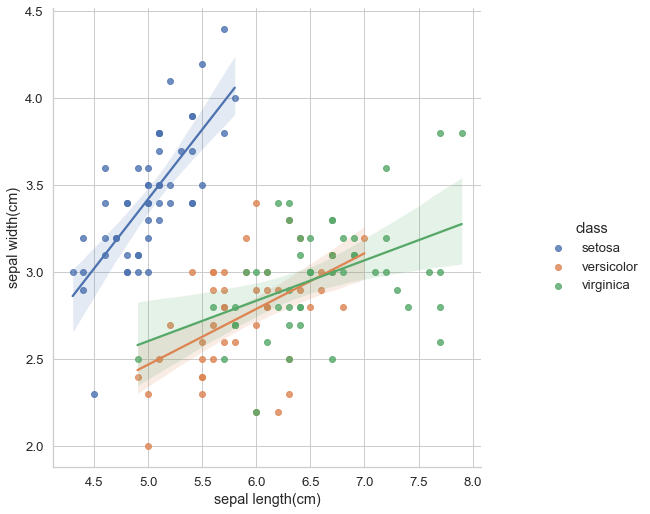

In [11]:
# 按变量分类拟合回归线
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             hue='class',
             )
g.fig.set_size_inches(10,8)

<Figure size 600x400 with 0 Axes>

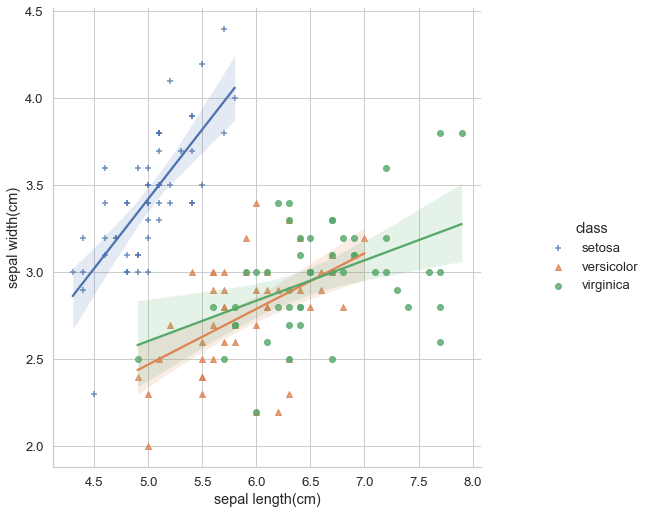

In [12]:
# 散点marker设置
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             hue='class',
             markers=['+','^','o'],   #设置散点marker          
             )
g.fig.set_size_inches(10,8)

<Figure size 600x400 with 0 Axes>

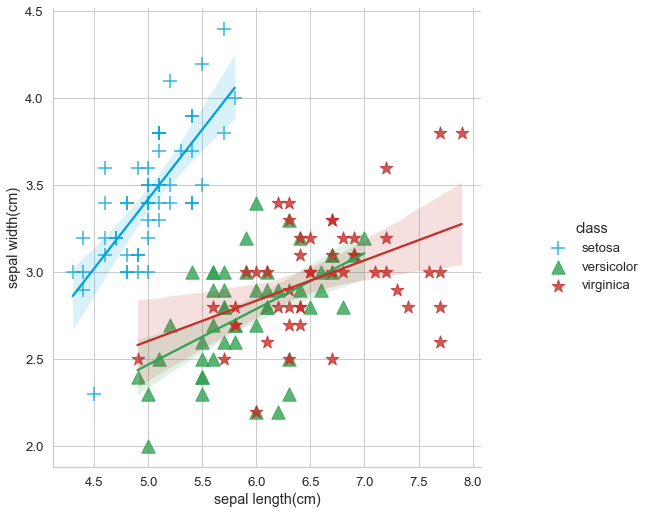

In [13]:
# 散点调色盘
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             hue='class',
             markers=['+','^','*'],
             scatter_kws={'s':180},
             palette=["#01a2d9", "#31A354", "#c72e29"],#调色盘
             )
g.fig.set_size_inches(10,8)

<Figure size 600x400 with 0 Axes>

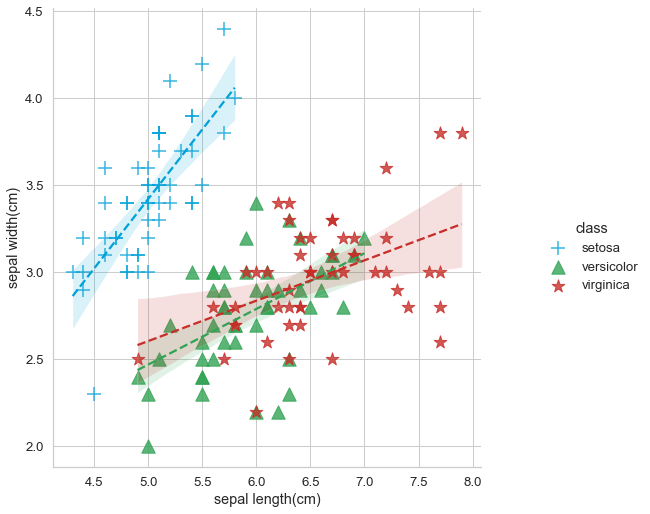

In [14]:
# 拟合线属性设置
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             hue='class',
             markers=['+','^','*'],
             scatter_kws={'s':180},
             line_kws={'linestyle':'--'},#拟合线属性设置
             palette=["#01a2d9", "#31A354", "#c72e29"],
             )
g.fig.set_size_inches(10,8)

<Figure size 600x400 with 0 Axes>

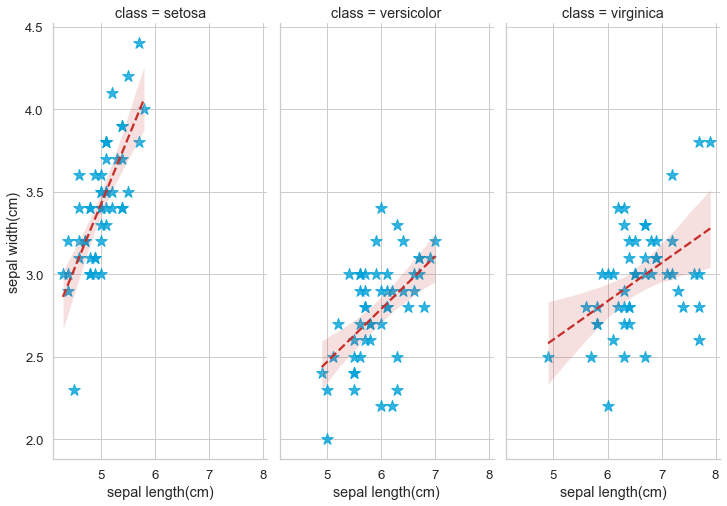

In [15]:
# 绘制分面图
plt.figure(dpi=100)
sns.set(style="whitegrid",font_scale=1.2)
g=sns.lmplot(x='sepal length(cm)', y='sepal width(cm)', data=pd_iris,
             col='class',#按class绘制分面图
             markers='*',
             scatter_kws={'s':150,'color':'#01a2d9'},
             line_kws={'linestyle':'--','color':'#c72e29'},#直线属性设置
             )
g.fig.set_size_inches(10,8)